In [23]:
import py.SimPy as sp
import numpy as np
import matplotlib.pyplot as plt
from galpy.potential import calcRotcurve, MWPotential2014
import pickle
import tqdm

In [2]:
with open('/home/bennett/nbody/data/n_part_equil.txt','r') as f:
    Np= f.read()
Np= np.array(Np.split('\n')[1].split(','),dtype='int')

In [3]:
try:
    with open('data/snaps/equil_306_snap','rb') as f:
        snap= pickle.load(f)
except:
    fname='/epsen_data/scr/bennett/MyMW_1e9/MyMW_306.00000'
    snap= sp.Snapshot(fname,Np[0],hf=Np[1],df=Np[2],bf=Np[3],Nslice=10,frac=False,dt=0.0098)

In [17]:
with open('data/snaps/equil_306_snap','wb') as f:
    pickle.dump(snap,f)

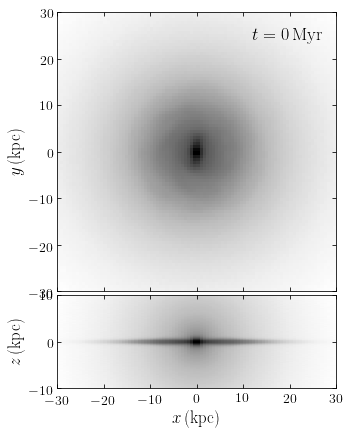

In [5]:
snap.plot_density()

In [6]:
snap.calc_potential()
snap.calc_vrot()
vrotscf= calcRotcurve(snap.pot,snap._Rs,phi=0.)

data/equil_potential_coefficients_N5153.txt


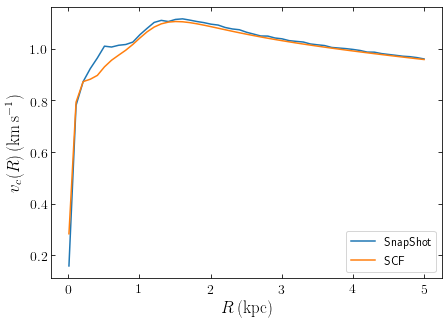

In [12]:
plt.figure(figsize=(7,5))
plt.plot(snap._Rs,snap.vrot,label='SnapShot')
plt.plot(snap._Rs,vrotscf,label='SCF')
plt.xlabel(r'$R/R_0\,(\mathrm{kpc})$')
plt.ylabel(r"$v_c(R)/v_c(R_0)\,(\mathrm{km\,s}^{-1})$")
plt.legend()

In [14]:
import galpy
import pynbody as pb

sample= snap.sample(frac=0.01)
    
Nh= len(sample[tuple([sample[:,0]==sample[0,0]])])

f= pb.new(dm=Nh,star=0)
f['mass']= sample[:Nh,0]/snap.MMU
f['pos']= sample[:Nh,1:4]/snap.MLU
f['vel']= sample[:Nh,4:]/snap.MVU
f['eps']= np.ones(Nh)*0.05/snap.MLU

sp= galpy.potential.SnapshotRZPotential(f,num_threads=10)
vrot= galpy.potential.calcRotcurve(sp,snap._Rs,phi=0.)

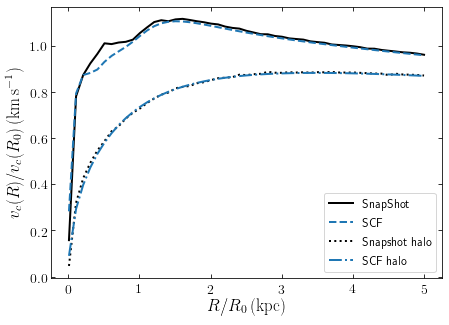

In [34]:
vrotscf_halo= calcRotcurve(snap.pot[0],snap._Rs,phi=0.)

plt.figure(figsize=(7,5))
plt.plot(snap._Rs,snap.vrot,label='SnapShot',c='k',lw=2)
plt.plot(snap._Rs,vrotscf,label='SCF',c='C0',ls='--',lw=2)
plt.plot(snap._Rs,vrot,label='Snapshot halo',c='k',lw=2,ls=':')
plt.plot(snap._Rs,vrotscf_halo,label='SCF halo',c='C0',lw=2,ls='-.')
plt.xlabel(r'$R/R_0\,(\mathrm{kpc})$')
plt.ylabel(r"$v_c(R)/v_c(R_0)\,(\mathrm{km\,s}^{-1})$")
plt.legend()

plt.savefig('plots/Rot_curve_comp.pdf',bbox_inches='tight')

In [ ]:
snap.analyze_SN(0.5,X=8.1,Y=0)
snap.analyze_SN(0.5,X=8.1/np.sqrt(2),Y=8.1/np.sqrt(2))
snap.analyze_SN(0.5,X=0.,Y=8.1)
snap.analyze_SN(0.5,X=-8.1/np.sqrt(2),Y=8.1/np.sqrt(2))
snap.analyze_SN(0.5,X=-8.1,Y=0)
snap.analyze_SN(0.5,X=-8.1/np.sqrt(2),Y=-8.1/np.sqrt(2))
snap.analyze_SN(0.5,X=0.,Y=-8.1)
snap.analyze_SN(0.5,X=8.1/np.sqrt(2),Y=-8.1/np.sqrt(2))

In [ ]:
colors = plt.cm.rainbow(np.linspace(0,1,len(snap.SN)))
    
for i,sn in enumerate(sorted(snap.SN, key=lambda x: x.phi)):
    plt.errorbar(sn.z,sn.n,sn.n_err,c=colors[i],label=str(np.round(sn.phi,2)))
#plt.yscale('log')
plt.legend()

In [ ]:
colors = plt.cm.rainbow(np.linspace(0,1,len(snap.SN)))

for i,sn in enumerate(sorted(snap.SN, key=lambda x: x.phi)):
    plt.plot(sn.z,sn.N,c=colors[i],label=str(sn.phi))
plt.yscale('log')

In [ ]:
colors = plt.cm.rainbow(np.linspace(0,1,len(snap.SN)))

for i,sn in enumerate(sorted(snap.SN, key=lambda x: x.phi)):
    plt.errorbar(sn.zA,sn.A,sn.A_err,c=colors[i],label=str(np.round(sn.phi,2)))
plt.legend(loc=3,ncol=2)
plt.ylabel(r'$\mathrm{A}$')
plt.xlabel(r'$\mathrm{z\,(kpc)}$')

In [ ]:
plt.errorbar(snap.SN[0].zA,np.mean([sn.A for sn in snap.SN],axis=0),np.std([sn.A for sn in snap.SN],axis=0)/np.sqrt(len(snap.SN)))
plt.ylabel(r'$\mathrm{\langle A\rangle}$')
plt.xlabel(r'$\mathrm{z\,(kpc)}$')
plt.savefig('plots/equil_meanA.pdf',bbox_inches='tight')

In [88]:
import glob
import re
times= glob.glob("/epsen_data/scr/bennett/MyMW_1e9/MyMW_*.00000")
times= sorted([tt for tt in times if not 'ids' in tt])
print(times)

['/epsen_data/scr/bennett/MyMW_1e9/MyMW_025.00000', '/epsen_data/scr/bennett/MyMW_1e9/MyMW_051.00000', '/epsen_data/scr/bennett/MyMW_1e9/MyMW_076.00000', '/epsen_data/scr/bennett/MyMW_1e9/MyMW_102.00000', '/epsen_data/scr/bennett/MyMW_1e9/MyMW_127.00000', '/epsen_data/scr/bennett/MyMW_1e9/MyMW_153.00000', '/epsen_data/scr/bennett/MyMW_1e9/MyMW_178.00000', '/epsen_data/scr/bennett/MyMW_1e9/MyMW_204.00000', '/epsen_data/scr/bennett/MyMW_1e9/MyMW_230.00000', '/epsen_data/scr/bennett/MyMW_1e9/MyMW_255.00000', '/epsen_data/scr/bennett/MyMW_1e9/MyMW_281.00000', '/epsen_data/scr/bennett/MyMW_1e9/MyMW_306.00000']


In [89]:
print(len(times))
for t in times:
    print(t)

12
/epsen_data/scr/bennett/MyMW_1e9/MyMW_025.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_051.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_076.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_102.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_127.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_153.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_178.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_204.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_230.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_255.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_281.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_306.00000


In [90]:
snaps= np.empty(len(times),dtype='object')

In [91]:
for i in tqdm.trange(len(times)):
    snaps[i]= sp.Snapshot(times[i],Np[0],hf=Np[1],df=Np[2],bf=Np[3],Nslice=10,frac=False,dt=0.0098)





  0%|          | 0/12 [00:00<?, ?it/s]



  8%|▊         | 1/12 [08:43<1:35:55, 523.24s/it]



 17%|█▋        | 2/12 [17:26<1:27:13, 523.38s/it]



 25%|██▌       | 3/12 [25:28<1:16:25, 509.47s/it]



 33%|███▎      | 4/12 [34:20<1:08:40, 515.09s/it]



 42%|████▏     | 5/12 [43:01<1:00:13, 516.22s/it]



 50%|█████     | 6/12 [51:51<51:51, 518.54s/it]  



 58%|█████▊    | 7/12 [1:00:37<43:18, 519.62s/it]



 67%|██████▋   | 8/12 [1:09:23<34:41, 520.45s/it]



 75%|███████▌  | 9/12 [1:18:14<26:04, 521.61s/it]



 83%|████████▎ | 10/12 [1:27:10<17:26, 523.08s/it]



 92%|█████████▏| 11/12 [1:35:54<08:43, 523.09s/it]



100%|██████████| 12/12 [1:44:39<00:00, 523.32s/it]





In [92]:
print(snaps)

In [93]:
for sn in snaps:
    sn.calc_vrot()

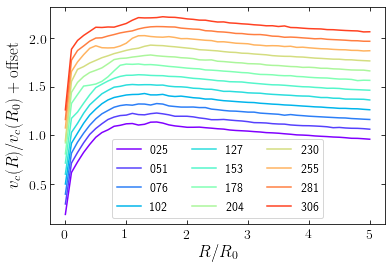

In [111]:
for i,sn in enumerate(snaps):
    plt.plot(sn._Rs,sn.vrot+0.1*i,c=plt.cm.rainbow(i/len(snaps)),label=sn.Filename[-9:-6])
plt.xlabel(r'$R/R_0$')
plt.ylabel(r"$v_c(R)/v_c(R_0)+\mathrm{offset}$")
plt.legend(ncol=3)

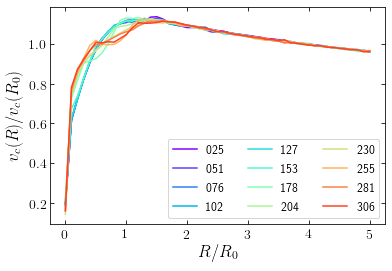

In [112]:
for i,sn in enumerate(snaps):
    plt.plot(sn._Rs,sn.vrot,c=plt.cm.rainbow(i/len(snaps)),label=sn.Filename[-9:-6])
plt.xlabel(r'$R/R_0$')
plt.ylabel(r"$v_c(R)/v_c(R_0)$")
plt.legend(ncol=3)

In [120]:
for sn in snaps:
    with open('data/snaps/equil_'+str(sn.Filename[-9:-6])+'_snap','wb') as f:
        pickle.dump(snap,f)

/epsen_data/scr/bennett/MyMW_1e9/MyMW_025.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_051.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_076.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_102.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_127.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_153.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_178.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_204.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_230.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_255.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_281.00000
/epsen_data/scr/bennett/MyMW_1e9/MyMW_306.00000


In [125]:
(sn.Filename.split('_')[3]).split('.')[0]

'306'